<a href="https://colab.research.google.com/github/axeluriben/ProgrammingAssignment2/blob/master/configuracion_funcional_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tabulate import tabulate
import os
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import itertools
import csv
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter
import collections
from google.colab.patches import cv2_imshow
from numpy import expand_dims





Mounted at /content/drive


#Aplicación para realizar cambios de configuración (Change Over)



---

>**Motivación**

Conforme a mi experiencia, realizar cambios de configuración es una actividad que debería demandar solamente la atención del técnico que la realiza, pero para lograr eso es necesario primeramente información relevante, actualizada, confiable, completa y objetiva.

La falta de calidad en la información es un problema recurrente en muchas empresas aunque en la actualidad esta sea un recurso imprescindible para cualquier proyecto debido a que su uso e interpretación generalmente se refleja en el éxito o fracaso de los mismos.

La idea del sistema nace originalmente de la necesidad personal ya que como técnico mediante mi experiencia laboral he aprendido a reconocer los principales fallos de las actividades que realizo, y al mismo tiempo del conocimiento en sistemas de la información, los cuales desarrollan un papel importante en las empresas en la actualidad, llevando a las organizaciones no solamente a operar y cumplir con sus metas, si no proyectarse al futuro para distanciarse de la competencia.

>**Introducción**

La aplicación pretende fijar procedimientos que se adapten al entorno de trabajo, con la finalidad de responder a cambios de configuración de manera eficaz en el menor tiempo posible.

La herramienta fue diseñada para auxiliar al técnico a realizar los cambios de configuración en cada molde que lo requiera, aunque la base de la aplicación puede ser aplicada en actividades similares, por lo que esta libreta pretende ilustrar la arquitectura del software y hardware necesaria para lograr dicho objetivo.

>**Implementación actual de cambios de configuración**

Un molde de inyección de plástico está conformado por múltiples elementos, y para realizar los cambios es necesario intercambiar esos elementos con la finalidad de obtener una figura diferente en el producto final. la forma en la que el cambio es realizado es la siguiente:

Cada molde es reconocido por un identificador único, generalmente es un número de 2 cifras seguido de un guión y finalmente un número de 7 cifras que crea el identificador de molde.

-> ejemplos de la sintaxis:(21-1234567), (20-2345678), (19-4224674)...

Aquellos moldes a los que se les puede hacer el cambio de configuracion llevan asociado tambien un numero de parte que corresponde a una "familia":

un ejemplo ficticio sería:

molde -> (21-1234567) requiere el cambio de configuración de la familia 2203456 y la configuración entrante será -1.

2203456-1, 2203456-2, 2203456-3... Un solo molde puede tener desde una sola familia con una o varias configuraciones hasta un conjunto de familias y este a su vez un subconjunto de configuraciones posibles.


> **La distribución del molde y sus familias puede representarse de la siguiente manera**



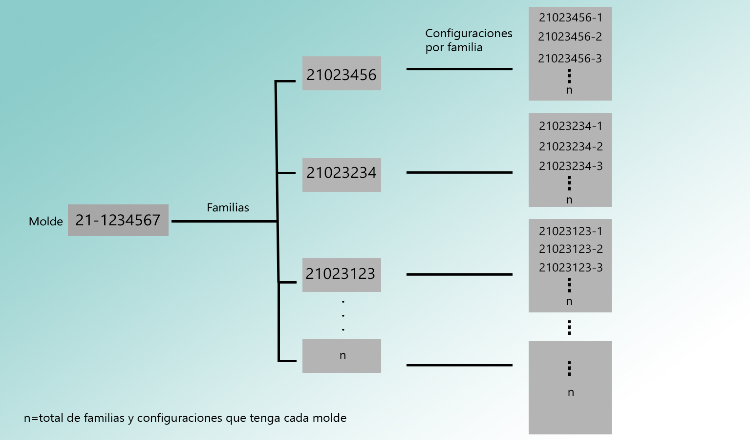

In [2]:
 
imag=cv2.imread("/content/drive/MyDrive/Configuraciones/moldes.jpg",1)
imS = cv2.resize(imag, (750, 440))                # Resize image
cv2_imshow(imS)


**Estructura de la información**

> Como se puede observar un solo molde puede tener asociado un conjunto finito de "familias" y a su vez cada una de estas tiene un subconjunto finito de configuraciones que se le pueden realizar al molde.

la forma en la que un técnico obtiene la información de un cambio de configuración es mediante una orden de trabajo en la que se especifica el número de molde y una nota que puede decir algo como: 

*  *realizar cambio de configuración a 21023123-1* 


**Ubicacion y ejecución**

El método para obtener la información de los cambios y la manera en la que se guarda la información es la siguiente

Toda la información sobre los moldes y sus respectivos cambios se almacenan en carpetas físicas, en las que debería encontrarse cada uno de los planos de las piezas que conforman el molde, así como la información de cuántas familias tiene el molde y los cambios de configuración de cada una de las familias.

El problema es que la información de la mayoría de los moldes es difícil de encontrar, muy difícil de interpretar debido a las ambigüedades y poco clara. principalmente por las ilustraciones de los planos. un cambio de configuración podría verse como el siguiente ejemplo:


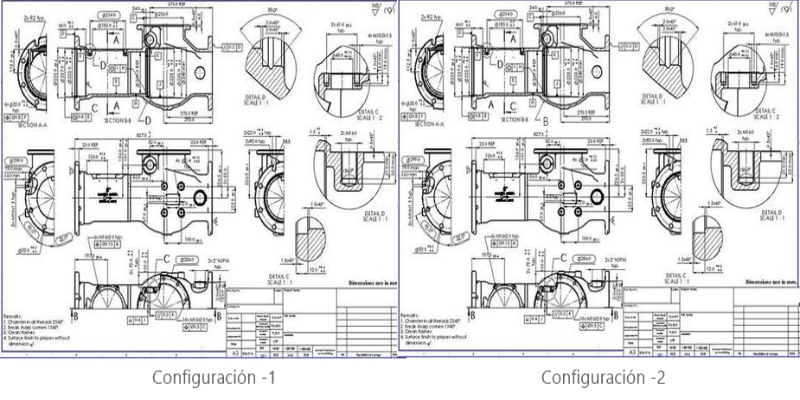

In [3]:

imag=cv2.imread("/content/drive/MyDrive/Configuraciones/comparacion.jpg",1)
imS = cv2.resize(imag, (800, 400))                # Resize image
cv2_imshow(imS)

Resulta entonces una actividad compleja poder realizar un cambio ya que como se aprecia en las imágenes ambas parecen ser iguales aunque no lo son, existen ligeros cambios en cada una de ellas, además secciones del plano en las que no existe ningun cambio, el tecnico tiene que determinar mediante una inspección visual en cada figura cuáles son los elementos que cambian entre cada una.

Posteriormente el técnico hace una lista de las diferencias en donde se encuentra el número de parte de cada uno de los insertos que conforman el ensamble para finalmente colocar esos insertos en el molde.


> **Estructura de software para el desarrollo de la aplicacion (consideraciones y aspectos importantes)**

En esta sección se comienza a ilustrar el desarrollo de la distribución de la información en el sitio y las razones por las que fue diseñada de esa manera.

La primera consideración para tomar en cuenta es la necesidad de un sistema que sea escalable ya que los moldes cumplen un ciclo de vida y son reemplazados por otros, aunque no existe información fija la mayoría de los moldes cumplen un ciclo de vida bastante largo.
teniendo en cuenta esto, los moldes se deben poder registrar y eliminar de una forma bastante clara y sencilla, básicamente tomando de referencia que el usuario final tiene conocimientos muy básicos de sistemas

Considerando estos aspectos la arquitectura fue diseñada casi como una conversión digital de la información física que el usuario consultaba de las carpetas, resulta extremadamente útil ya que el usuario está familiarizado ya con este tipo de distribución de la información.

todas las consideraciones contribuyeron a determinar el esquema de la información que se muestra en la imagen:






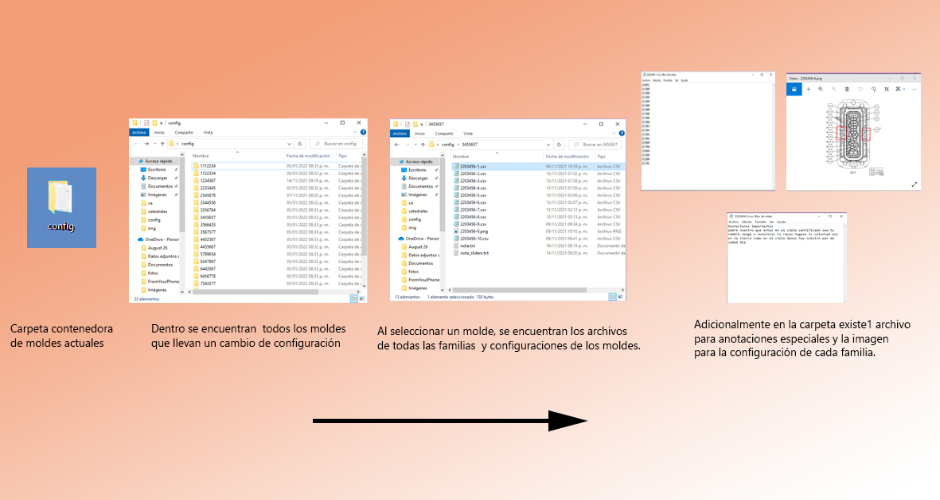

In [4]:
imag=cv2.imread("/content/drive/MyDrive/Configuraciones/ciclo.jpg",1)
imS = cv2.resize(imag, (940, 500))                # Resize image
cv2_imshow(imS)



*   Carpeta contenedora de moldes

  la ventaja de tener esta estructura es principalmente lo fácil que es agregar o eliminar moldes para cualquier usuario, en mi caso ***tomando en cuenta que no hay personal suficiente para todas las tareas que se realizan actualmente y la forma en la que rotan los turnos no permiten que exista solamente una persona especializada en administrar un software complejo.***
  
 por lo tanto la simpleza es un aspecto relevante en este esquema, si se necesita agregar un nuevo molde el usuario solo debe crear una carpeta con el nombre del molde y dentro agregar un archivo de texto con la información del cambio de cada familia (el número de parte de los insertos que aparecen en el plano), cada archivo lleva como título el nombre de configuración. El sistema se encargará de hacer la distinción entre familias y calcular la diferencia entre los insertos de cada una, sustituyendo esta parte la tarea de que el usuario realice la inspección visual en todo el plano tratando de encontrar diferencias).

*  Archivos adicionales
  
  Dentro de la carpeta además de los archivos de configuración se debe guardar una imagen correspondiente a cada uno de los cambios de configuración de las familias, esta imagen es una referencia para el usuario, en el paso anterior el usuario obtuvo ya cuantos insertos deben cambiar y cuáles deben cambiar, ahora debe saber dónde colocarlos.

Las imágenes son las mismas que el usuario vería en el plano, pero como la finalidad es hacerlo simple no se muestra todo el plano, solo extraer de este las partes que cambian con la finalidad de hacerlo comprensible.

por último un agregue un archivo de texto de anotaciones en las que se pueden escribir consideraciones especiales para cada cambio que el técnico mediante su interacción con el tiempo puede notar y pueden resultar relevantes para posteriores cambios, el usuario solo debe anotar sus notas en el archivo correspondiente a cada molde y el sistema se encargará de desplegarlas.





---


> **Funcionamiento de la aplicación**



---

  *Nota: la aplicación es un prototipo que he realizado tomando en cuenta ciertos casos particulares, considero que su construcción y funcionamiento se toman en cuenta los peores casos (cuando un molde tiene varias configuraciones con varias familias) y obviamente los casos simples que solo llevan una familia con uno o varios cambios.*

*La estructura resulta ser bastante realista dada la restricción de la información ya que este proyecto ha sido desarrollado en mi casa y hay ciertos aspectos de privacidad que impiden que cuente con información delicada e importante para continuar desarrollando ciertas ideas y realizar más pruebas.*

*Por último adelanto que me he centrado más en el funcionamiento general de  la aplicación por lo que podrán ver que hacen falta detalles como la validación de los campos de texto, implementación de funciones y mejorar ciertos aspectos de la presentación de la información, De momento se esta trabajando para añadir nuevas mejoras que sirvan como plantilla para cualquier empresa o tarea que requiera un cambio de configuración*


---


La aplicación fue creada en Python al ser un sistema altamente compatible con la arquitectura de la distribución de archivos.

Esta consiste en un formulario con 3 campos de texto.


1.   Ingresar el número de molde

  este campo es para que el usuario ingrese el número de molde, aunque en la representación de la sintaxis se describe como dos números + identificador de molde de 7 dígitos, lo he programado para que solamente reciba los 7 dígitos. [ Molde -> 1234567 ]


2.   Ingresar la configuración actual

  El segundo campo es para que el usuario ingrese el número de la configuración actual del molde con la misma sintaxis de la estructura previa (siete dígitos que representan la familia, separados por un guión que representa la configuración de dicha familia).

   [ configuración actual -> 2203123-1 ]

3. Ingresar la nueva configuración

  Por último el usuario debe ingresar el número de la configuración nueva del molde. (Misma sintaxis)












In [5]:
configuraciones = '/content/drive/MyDrive/Configuraciones' #Variable configuraciones guarda la ruta de la carpeta contenedora de moldes 

#1046544
#2203456-2
#2203456-10

In [15]:
""" los parametros ingresados por el usuario en los campos de texto se guardan en 3
variables (molde, configuracion actual y configuracion entrante respectivamente)
"""

#@title Cambios de configuracion
Molde = "1046544" #@param {type:"string"}
Configuracion_Actual = "2203456-2" #@param {type:"string"}
Configuracion_Entrante = "2203456-10" #@param {type:"string"}
configuracion_actual = ""
configuracion_entrante = ""



"""En esta parte del codigo se recopila la ruta especifica hasta el molde
que el usuario desea y se guarda en la variable ruta_molde, esta variable
sirve como target, ahora ya se sabra en que carpeta especifica buscar
 """

#obtener el molde deseado y cambiar la ruta  para su busqueda
ruta_molde = os.path.join(configuraciones,Molde) 
os.chdir(ruta_molde) #se cambia la ruta a la del molde que el usuario desea


"""se obtienen los archivos para las configuraciones ingresados
por el usuario (configuracion actual y entrante) los archivos se leen en
formato .csv """

actualcsv=Configuracion_Actual+".csv"
df1=pd.read_csv(actualcsv,header=None)
lista_act=df1.values.tolist()
entrancsv=Configuracion_Entrante+".csv"
df2=pd.read_csv(entrancsv,header=None)
list_entrantes=df2.values.tolist()


"""esta parte del codigo se encarga de mostrar al usuario la lista
 insertos que pertenecen a cada una de las configuraciones (entrante-saliente)
 y realiza la operacion para determinar que insertos difieren entre la
 la  lista de insertos de la configuracion actual y la entrante (nueva)"""


merged2= list(itertools.chain(*lista_act))
print("configuracion actual:   ",sorted(merged2))

merged1 = list(itertools.chain(*list_entrantes))
print("configuracion Entrante: ",sorted(merged1))


entran =list(set(merged1) - set(merged2))
salen = list(set(merged2) - set(merged1))

print ("\n") 

#esta parte del codigo se puede omitir o modificar para evitar confusiones
print ("Insertos que deben de Entrar") #Se refiere a insertos que no estan actualmente en ninguna de las configuraciones
#numeros de parte nuevo que no aparecen en ninguna de las listas actuales
print (sorted(entran)) 
print ("\n")
print ("Insertos que deben de Salir")
print (sorted(salen))



"""esta parte en realidad es la que muestra la informacion mas clara, muestra
cuantos insertos tienen que salir de cada cavidad y cuantos, ademas nos dice
que insertos son los que van a reemplazar la configuracion """

print ("\n") 
a=collections.Counter(merged1)
b=collections.Counter(merged2)
listafinal=Counter (a-b)
listafinsaliente=Counter (b-a)


print ("cantidad de insertos en la configuracion entrante por cavidad")
print (listafinal)
print ("\n")
print ("cantidad de insertos salientes de la configuracion actual por cavidad")
print (listafinsaliente)

"""imprime fragmento de texto que se encuentra en el archivo de las anotaciones, 
por que en este molde en particular cuando cambia de un numero par a inpar 
se deben tomar en cuenta ciertas consideraciones, de par a par otras que
basicamente esas consideraciones son eliminadas agregando la anotacion que se
imprime en este caso de uso de molde 1046544 """
print ("\n")
try:
 with open('nota.txt') as f:
    try:
      contents = f.read()
      print(contents)
    except:
      print("nada que mostrar")
except: 
  print("") 
  




configuracion actual:    [21000, 21001, 21100, 21200, 21300, 21300, 21300, 21300, 21300, 21300, 21300, 21300, 21300, 21302, 21304, 21304, 21304, 21400, 21700, 21701]
configuracion Entrante:  [21000, 21001, 21100, 21200, 21300, 21300, 21300, 21300, 21300, 21300, 21300, 21301, 21301, 21303, 21304, 21304, 21306, 21400, 21700, 21701]


Insertos que deben de Entrar
[21301, 21303, 21306]


Insertos que deben de Salir
[21302]


cantidad de insertos en la configuracion entrante por cavidad
Counter({21301: 2, 21306: 1, 21303: 1})


cantidad de insertos salientes de la configuracion actual por cavidad
Counter({21300: 2, 21302: 1, 21304: 1})



recuerda invertir el lugar de los insertos:

21700 - 21701 (Lado fijo)
31400 - 31401 (Lado movil) 

Intercambiar sliders


###Mostrar cambio

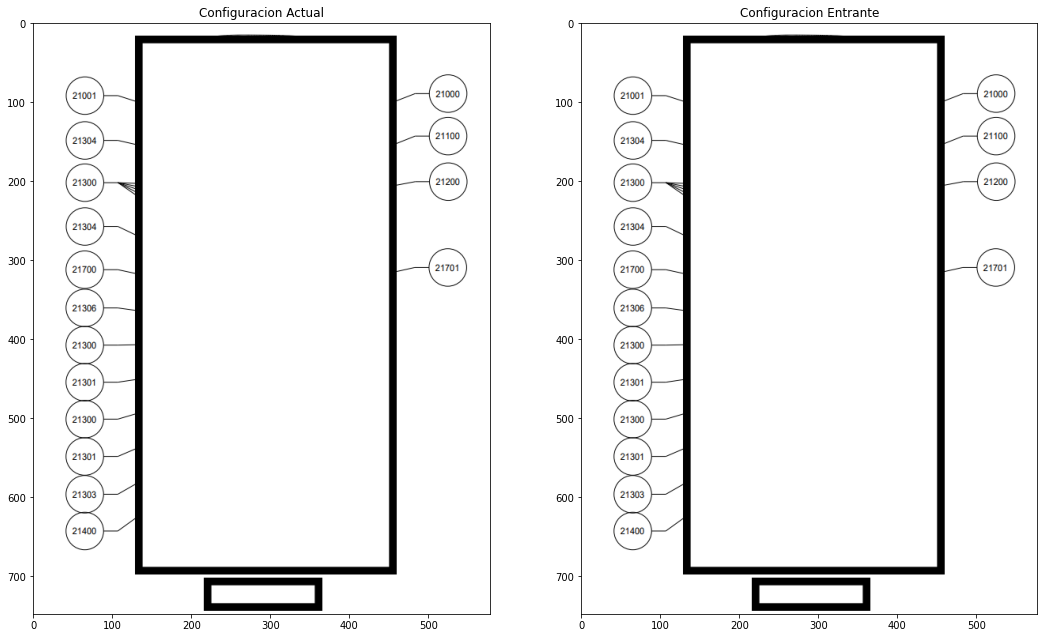

In [7]:
"""esta parte del codigo muestra las imagenes al usuario para una vez que tenga la lista de insertos
pueda localizar solo aquellos que cambian .

nota: todas las imagenes que aparecen son las mismas ya que no puedo extraer informacion de la empresa.
son imagenes representativas 

 """
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 18 ,17

# read images
img_A = mpimg.imread(Configuracion_Actual+".png")
img_B = mpimg.imread(Configuracion_Entrante+".png")

# display images

fig, ax = plt.subplots(1,2)
ax[0].title.set_text('Configuracion Actual')
ax[1].title.set_text('Configuracion Entrante')
ax[0].imshow(img_A);
ax[1].imshow(img_B);

#fig.savefig('config.png')


### Casos de uso



---


1. Moldes (familias y configuraciones)

  En realidad hasta este punto no importa la cantidad de familias que tenga un
  molde debido a la manera en la que está construida la arquitectura y el  diseño del software.

  
  El primer caso que se ilustrara es el de un molde con una sola familia, pondremos un ejemplo que se encuentra en la carpeta principal, el molde 1933446 este molde tiene un total de 13 configuraciones posibles. cada archivo de configuración guardado en su carpeta tiene escrito solo un número de parte (debido a que es el único número de parte que cambia en el molde) por  lo tanto cuando el usuario ingrese la configuración se debe mostrar un solo número de parte que entra y que sale.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

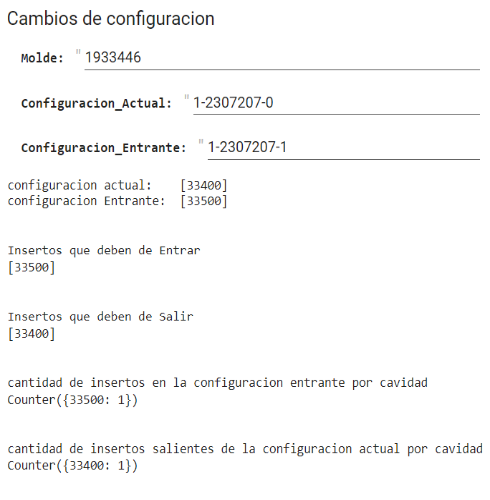

In [14]:
imag=cv2.imread("/content/drive/MyDrive/Configuraciones/caso1.png",1)
imS = cv2.resize(imag, (490, 500))                # Resize image
cv2_imshow(imS)


Como se puede observar es un ejemplo sencillo de comprender, se muestra la lista de los insertos de la configuración actual 33400, la entrante 33500, y la cantidad se muestra que solo 1 por cavidad.



  2. El segundo caso es el que se se encuentra cargado actualmente en la aplicación, es el del molde 1046544 que cuenta con una sola familia y con 1o posibles cambios, podría tomarse como uno de los más complejos por las consideraciones que se deben hacer al realizarlo. pero en realidad para la aplicación no implica procesamiento considerable.
  
  3. El último caso sería el de varias familias y varias configuraciones posibles que para fines prácticos funciona igual que todos los demás.


  >**Otras consideraciones**

  El prototipo que se muestra fue desarrollada en google colab ya que resulta una herramienta sencilla de utilizar y constantemente actualizada en todas las librerías.

La implementación como herramienta de escritorio que se muestra en un video
es exactamente lo mismo solo que adaptándola a la librería TKINTER que permite 
la creación de ventanas de escritorio en cualquier sistema linux, windows y mac. Ademas de que es la misma base para utilizar en Django






In [ ]:
conclusion